# Get ROC & efficiency from validation workflow

1. Run the validation workflow on ttbar MC sample
2. Extract ROC of b/c jet seperately(true flavor definition is different)
3. Check efficiency plot by the kinematic variables

## Load files

In [2]:
from coffea.util import load
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

output = load(
    "testfile/hists_validation_MC_Summer22EE_Run3_2022_BTV_Comm_v2_NanoV12_noPF.coffea"
)
output = output[list(output.keys())[0]]

## Get ROC for b/c jet

(0.0, 1.0)

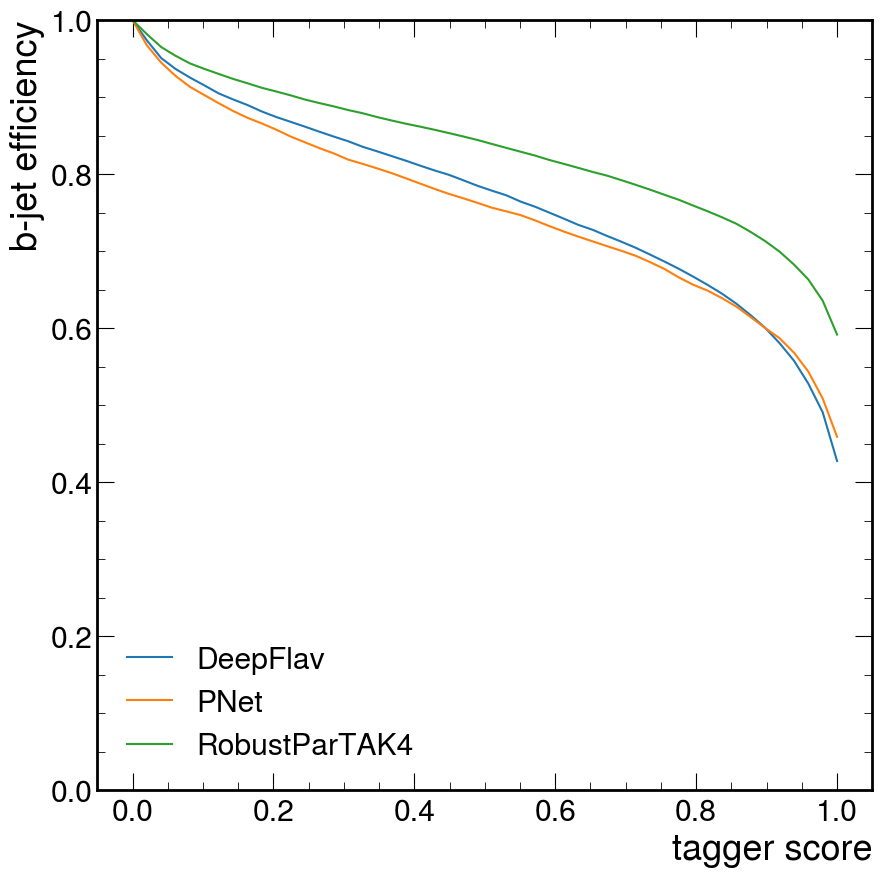

In [4]:
tagger = ["btagDeepFlav", "btagPNet", "btagRobustParTAK4"]
color = ["tab:blue", "tab:orange", "tab:green"]
colors = dict(zip(tagger, color))
plt.style.use(hep.style.ROOT)
for tag in tagger:
    axis = {"syst": "noSF", "flav": 3}  # consider b-jet only
    ROC = [
        np.sum(output[f"{tag}B_0"][axis].values()[i:])
        / np.sum(output[f"{tag}B_0"][axis].values())
        for i in range(len(output[f"{tag}B_0"][axis].values()))
    ]
    plt.plot(np.linspace(0, 1, 50), ROC, label=tag.replace("btag", ""))
plt.legend()
plt.ylabel("b-jet efficiency")
plt.xlabel("tagger score")
plt.ylim(top=1.0)
plt.ylim(0, 1)

(0.0, 1.0)

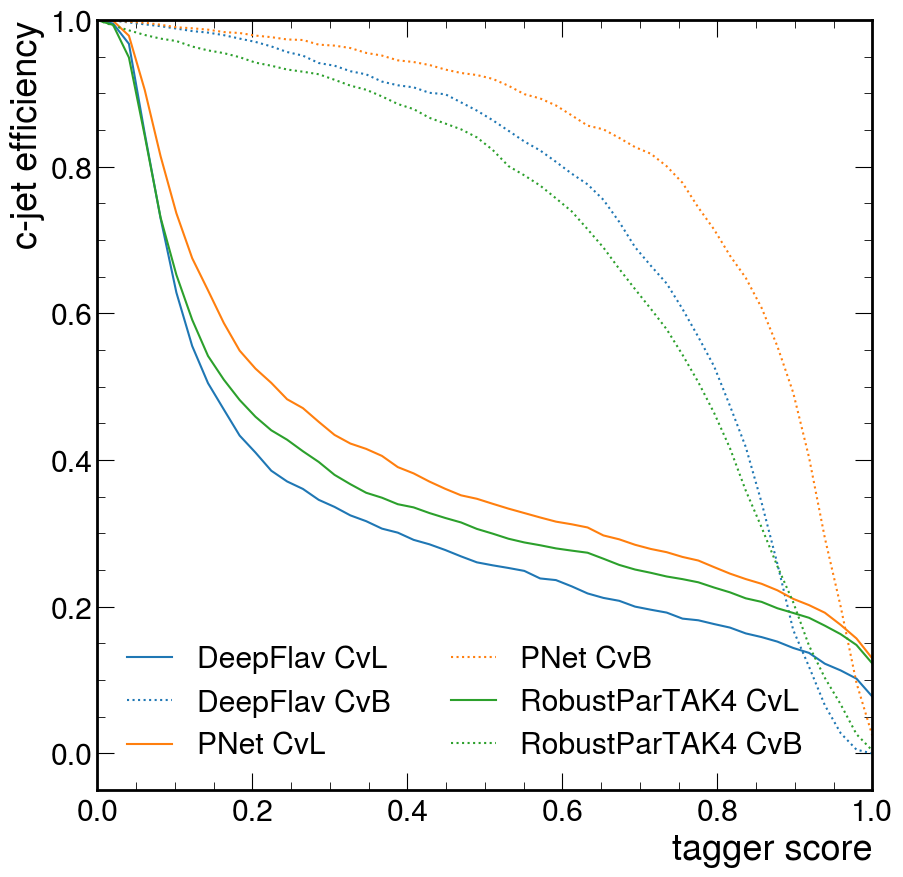

In [5]:
plt.style.use(hep.style.ROOT)
for tag in tagger:
    axis = {"syst": "noSF", "flav": 2}  # consider c-jet only
    ROC_CvL = [
        np.sum(output[f"{tag}CvL_0"][axis].values()[i:])
        / np.sum(output[f"{tag}CvL_0"][axis].values())
        for i in range(len(output[f"{tag}CvL_0"][axis].values()))
    ]
    ROC_CvB = [
        np.sum(output[f"{tag}CvB_0"][axis].values()[i:])
        / np.sum(output[f"{tag}CvB_0"][axis].values())
        for i in range(len(output[f"{tag}CvB_0"][axis].values()))
    ]
    plt.plot(
        np.linspace(0, 1, 50),
        ROC_CvL,
        label=tag.replace("btag", "") + " CvL",
        color=colors[tag],
    )
    plt.plot(
        np.linspace(0, 1, 50),
        ROC_CvB,
        label=tag.replace("btag", "") + " CvB",
        color=colors[tag],
        ls=":",
    )
plt.legend(ncols=2)
plt.ylabel("c-jet efficiency")
plt.xlabel("tagger score")
plt.ylim(top=1.0)
plt.xlim(0, 1)

## Efficiency plot of kinmetic variables

/nfs/dust/cms/user/milee/BTVNanoCommissioning/src/BTVNanoCommissioning/utils/plot_utils.py:381: RuntimeWarning: invalid value encountered in divide
  rsumw = sumw_num / sumw_denom
/nfs/dust/cms/user/milee/BTVNanoCommissioning/src/BTVNanoCommissioning/utils/plot_utils.py:390: RuntimeWarning: invalid value encountered in divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)


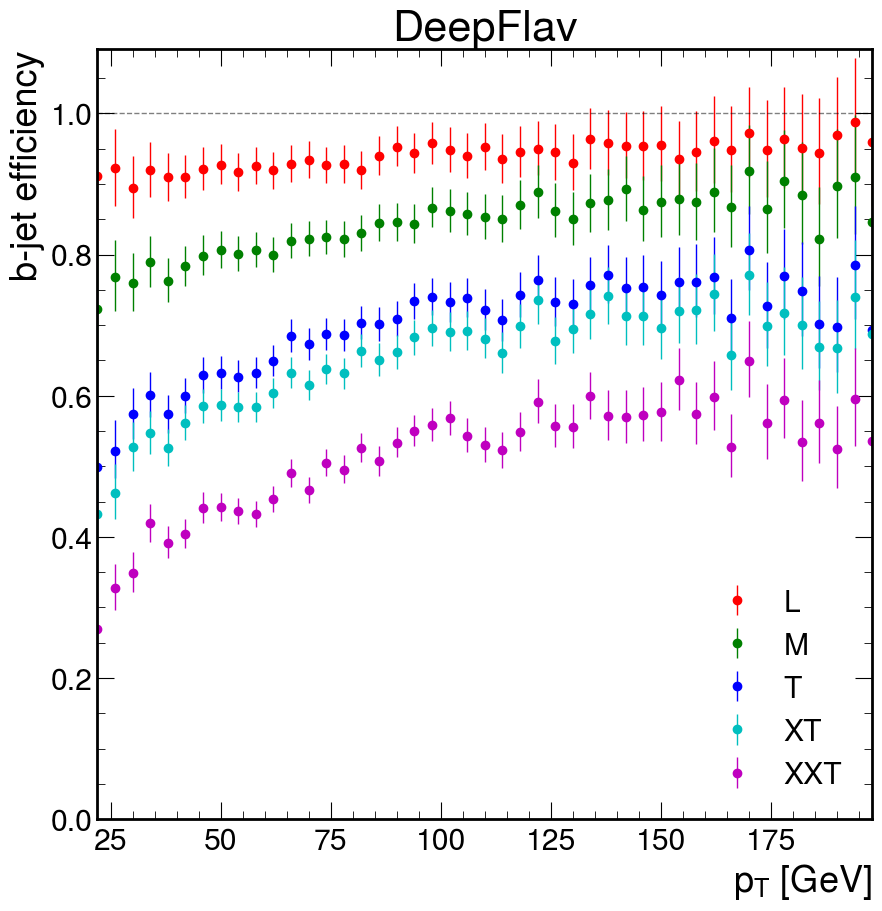

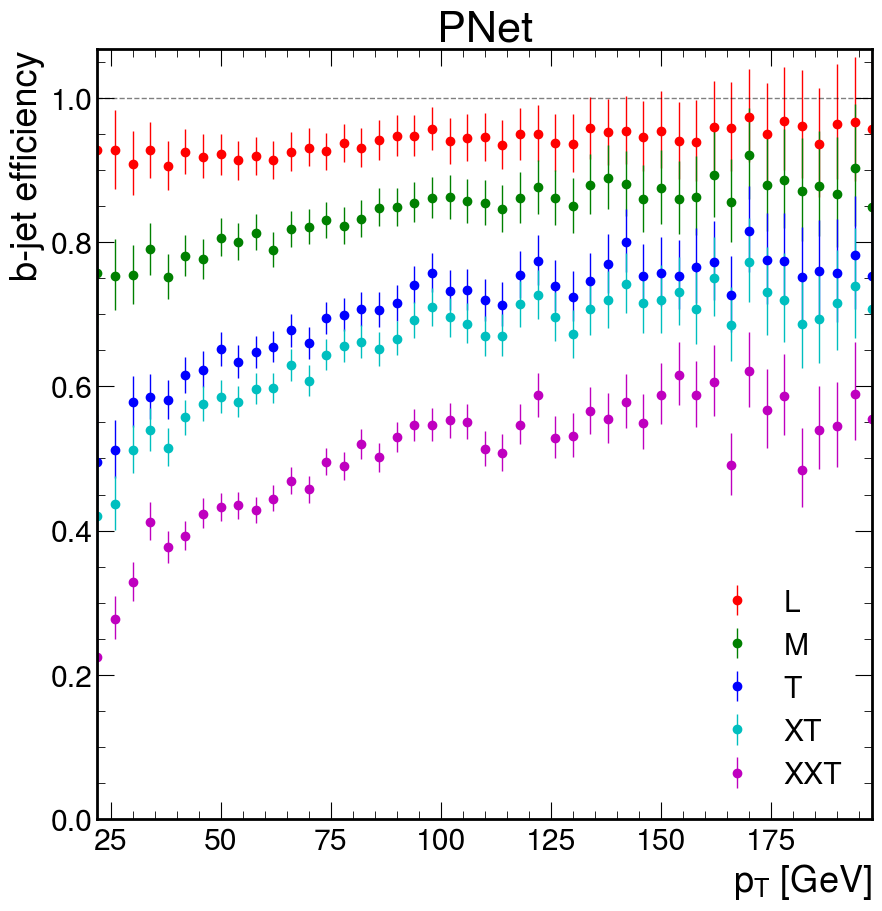

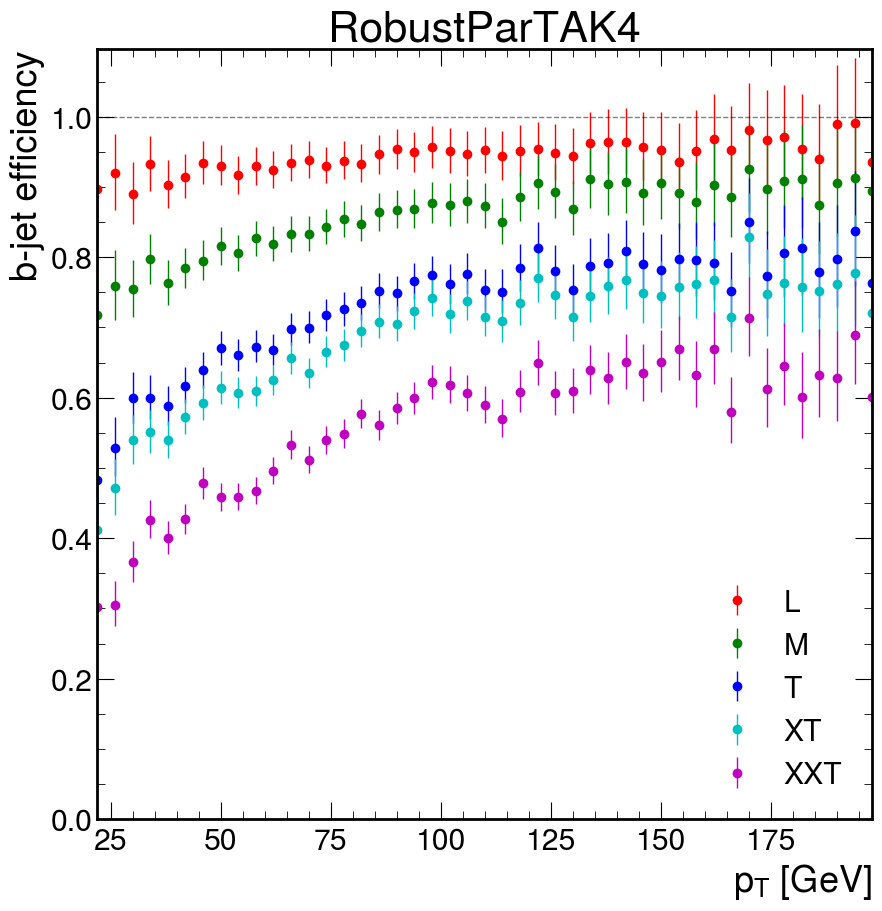

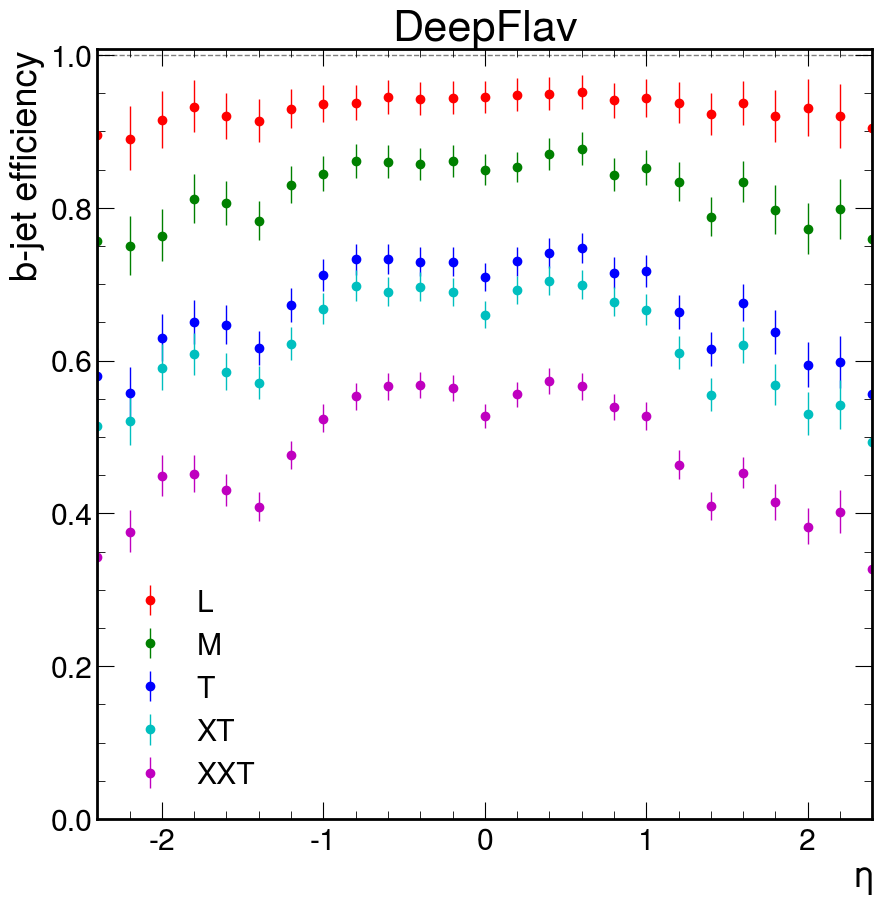

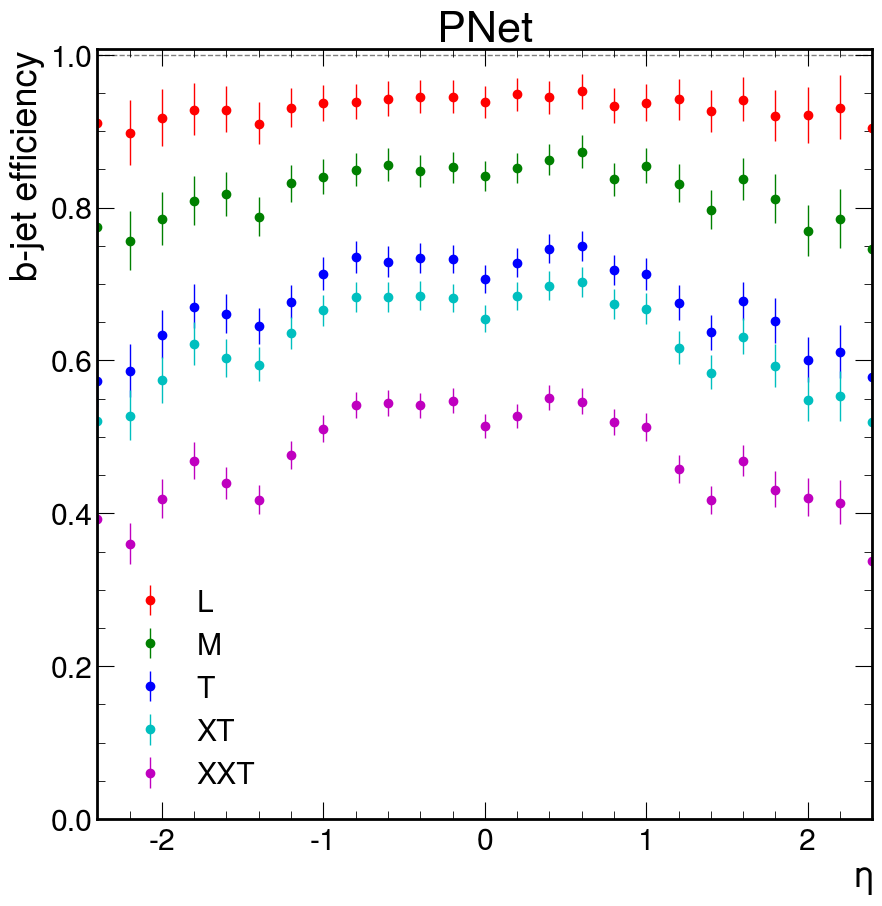

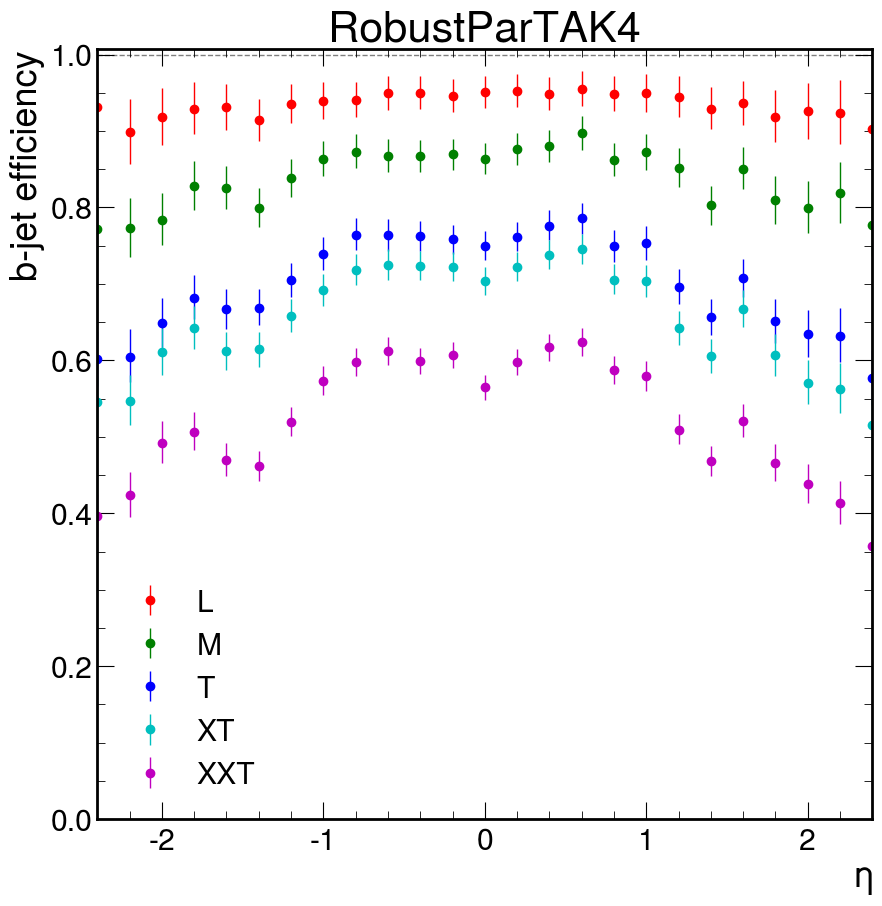

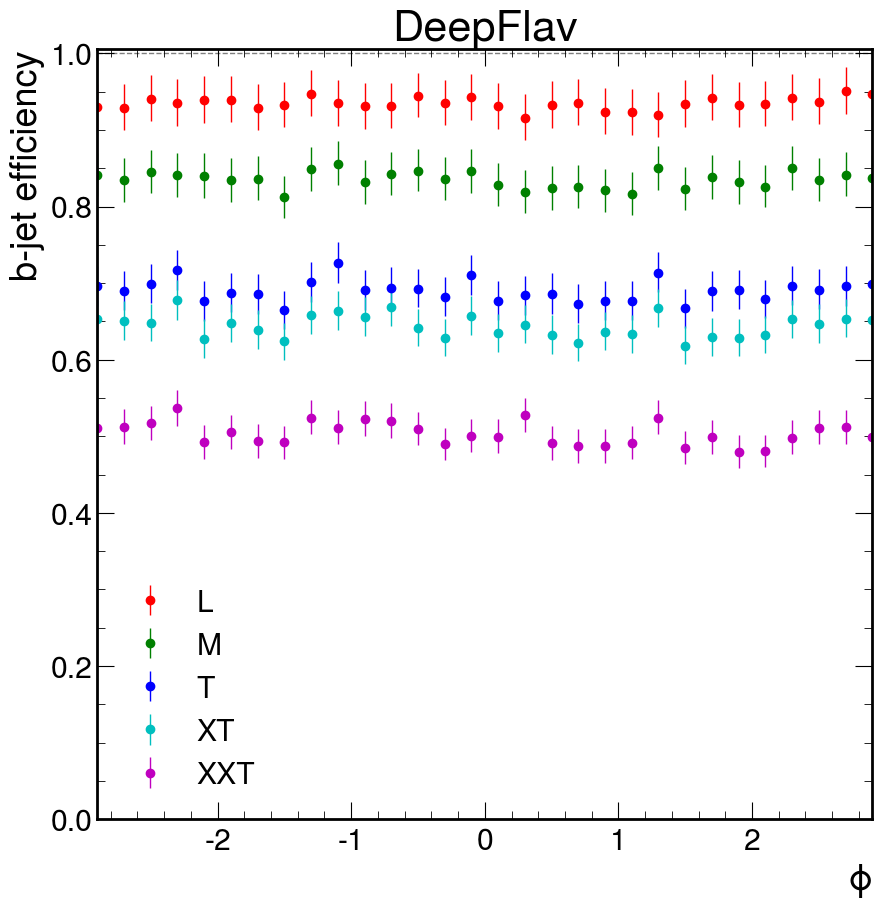

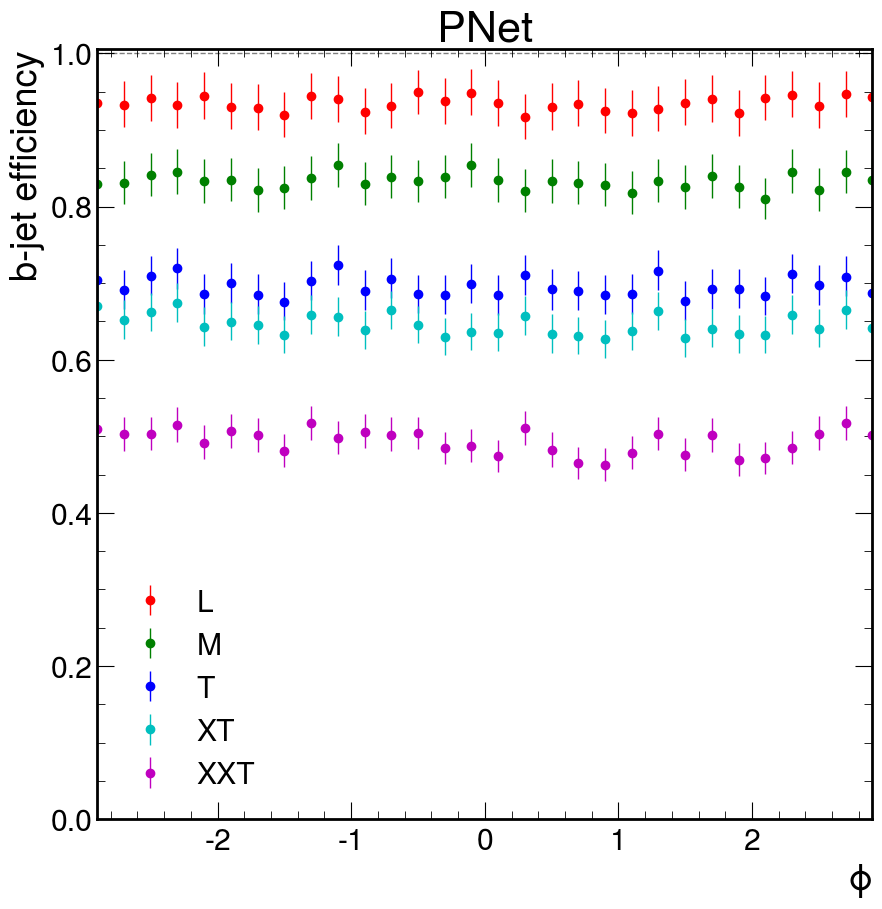

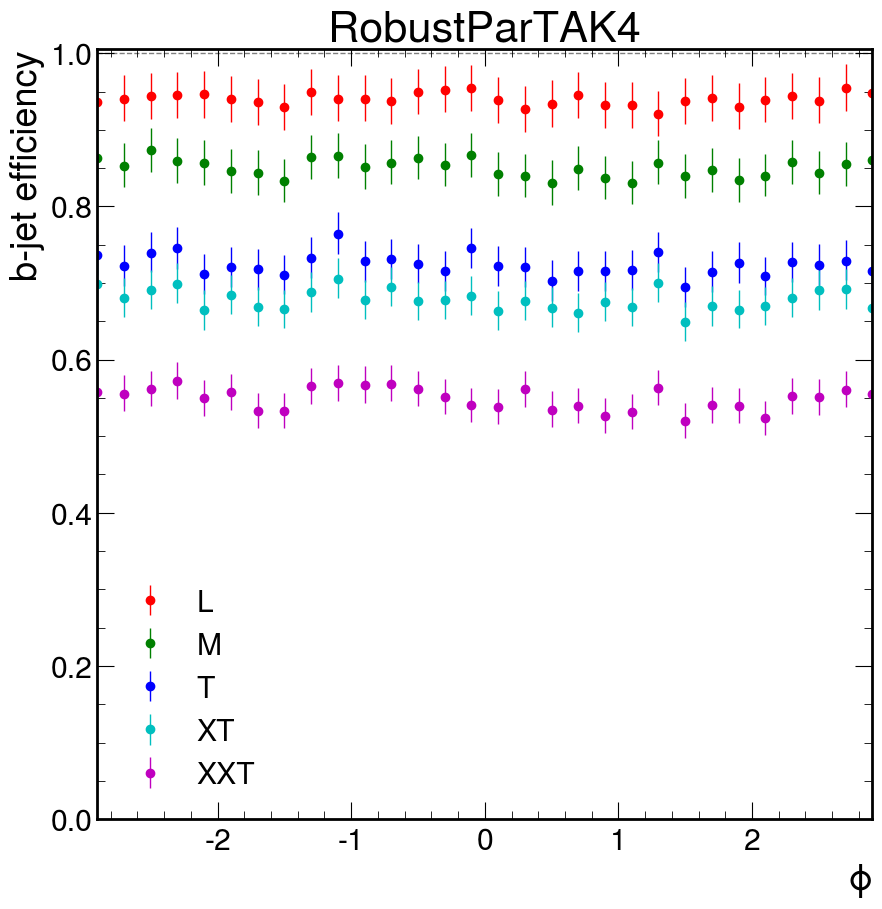

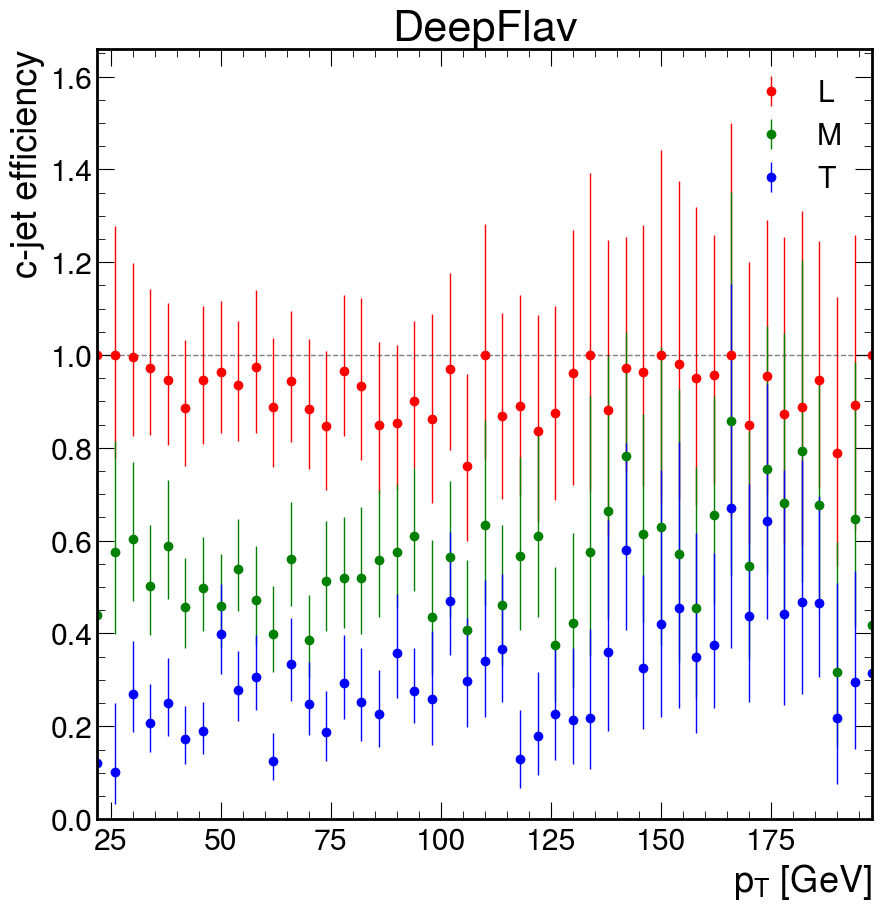

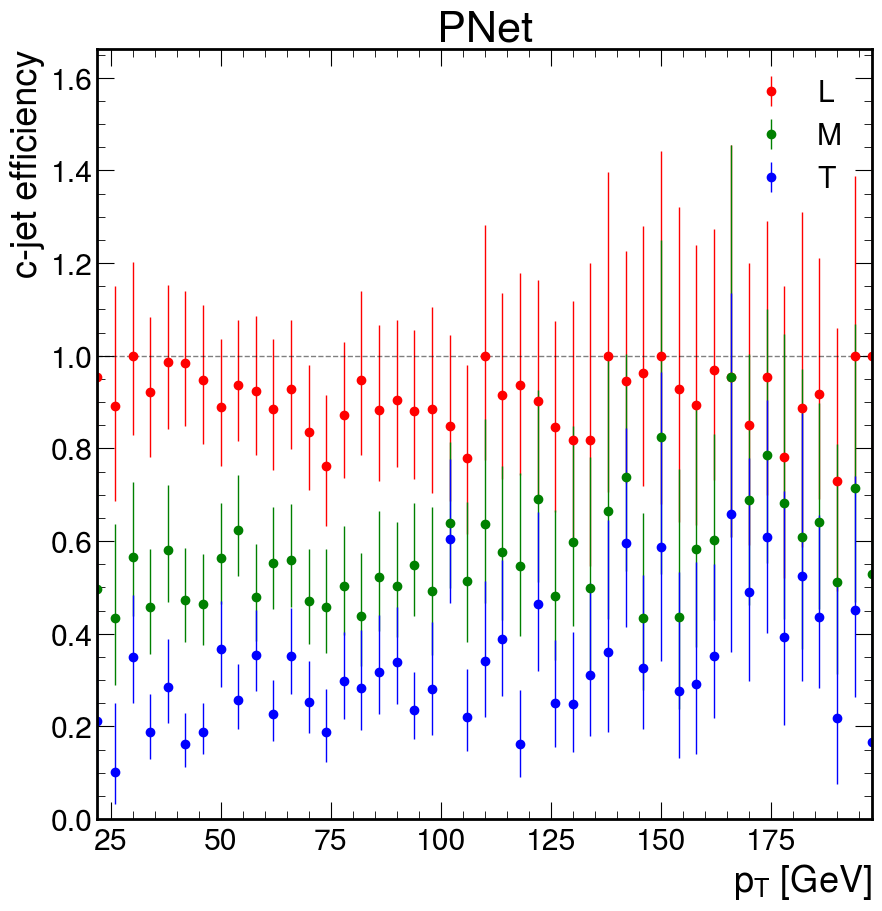

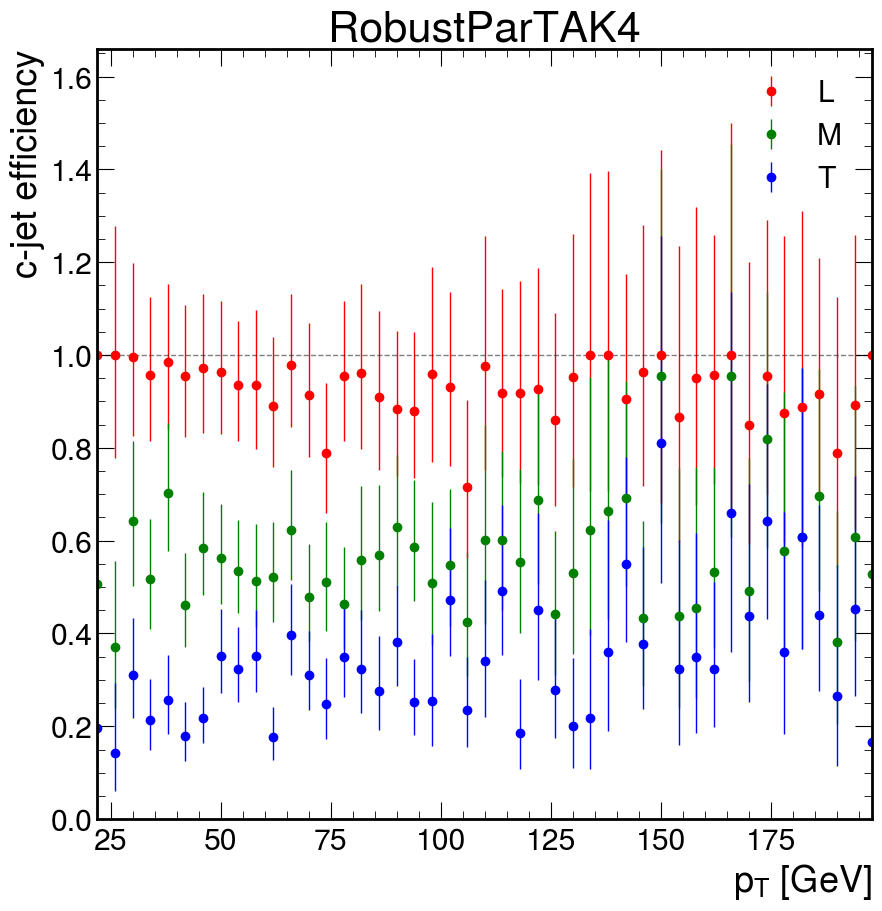

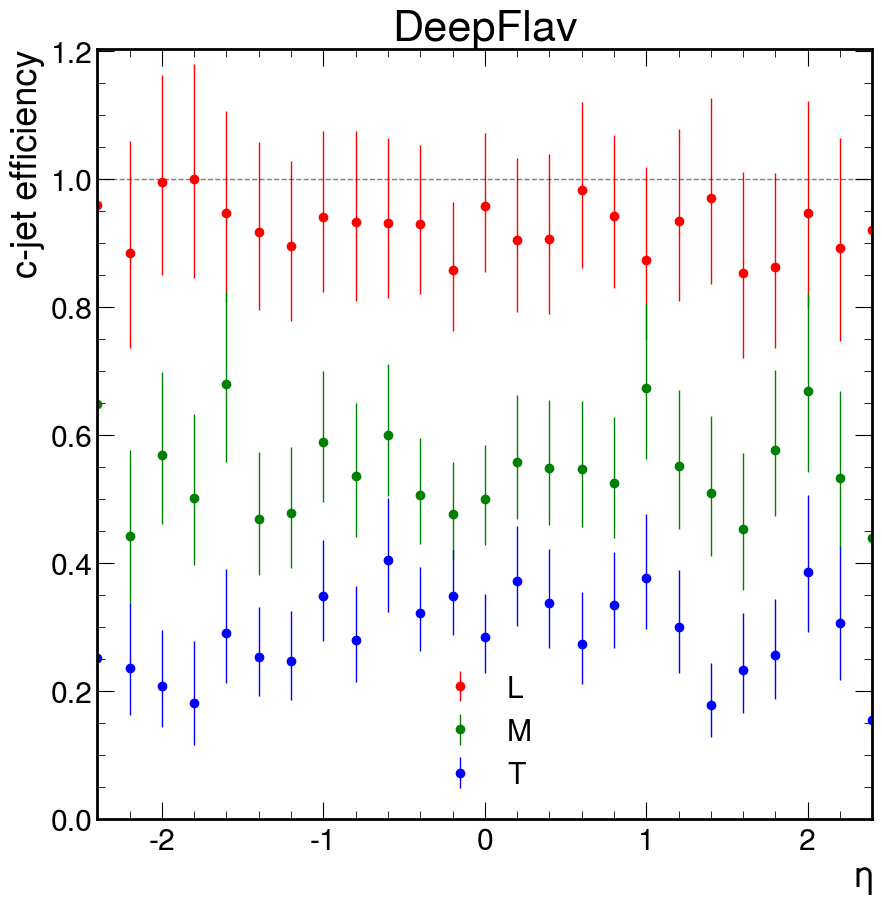

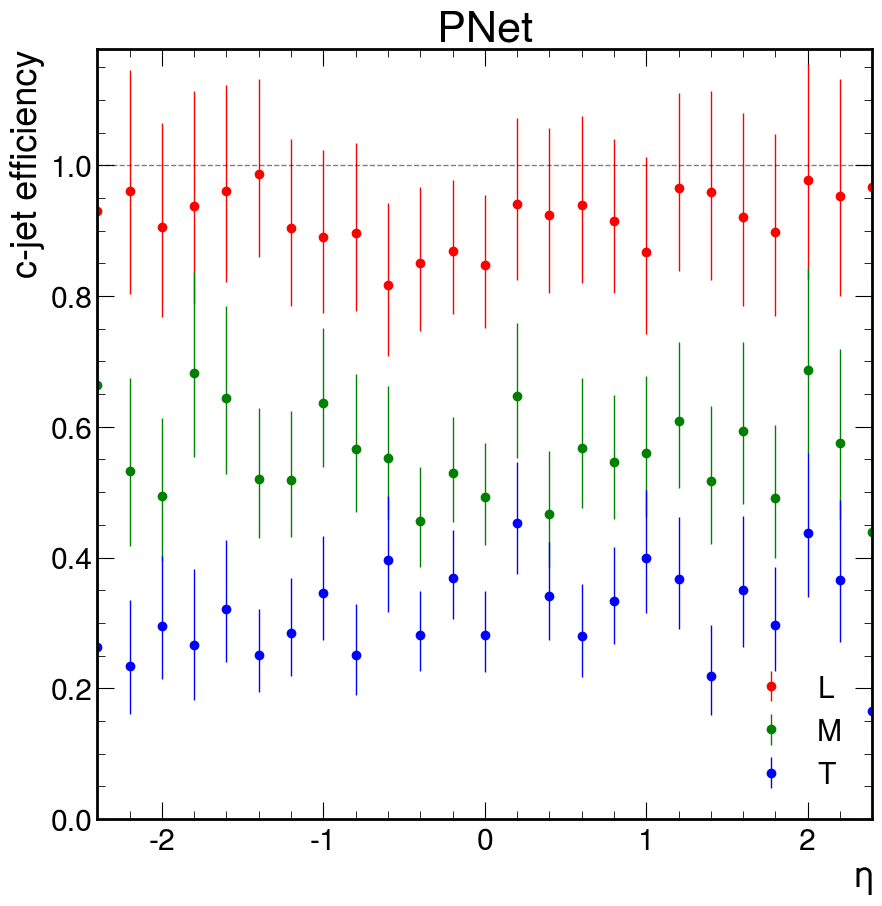

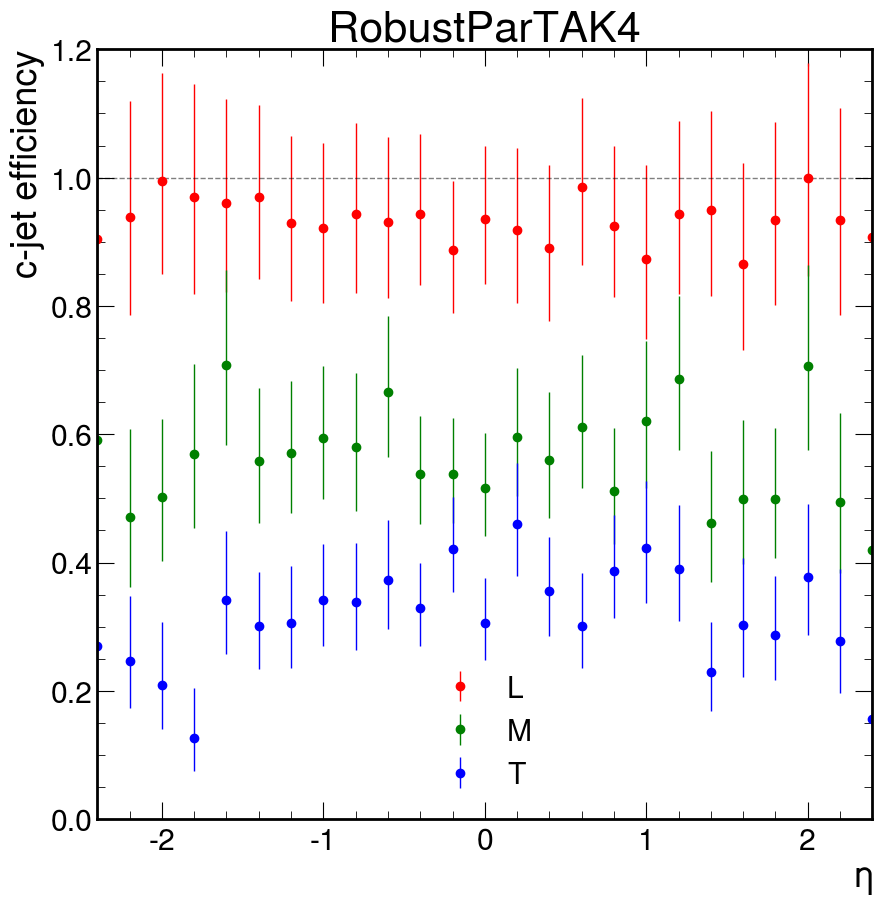

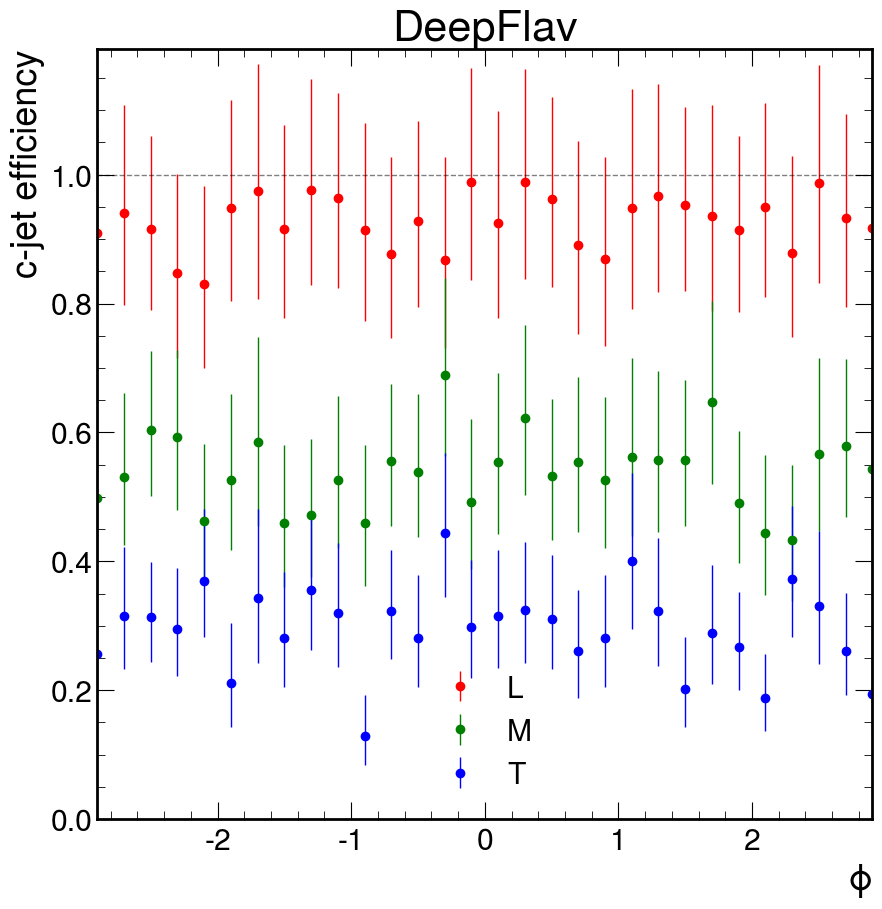

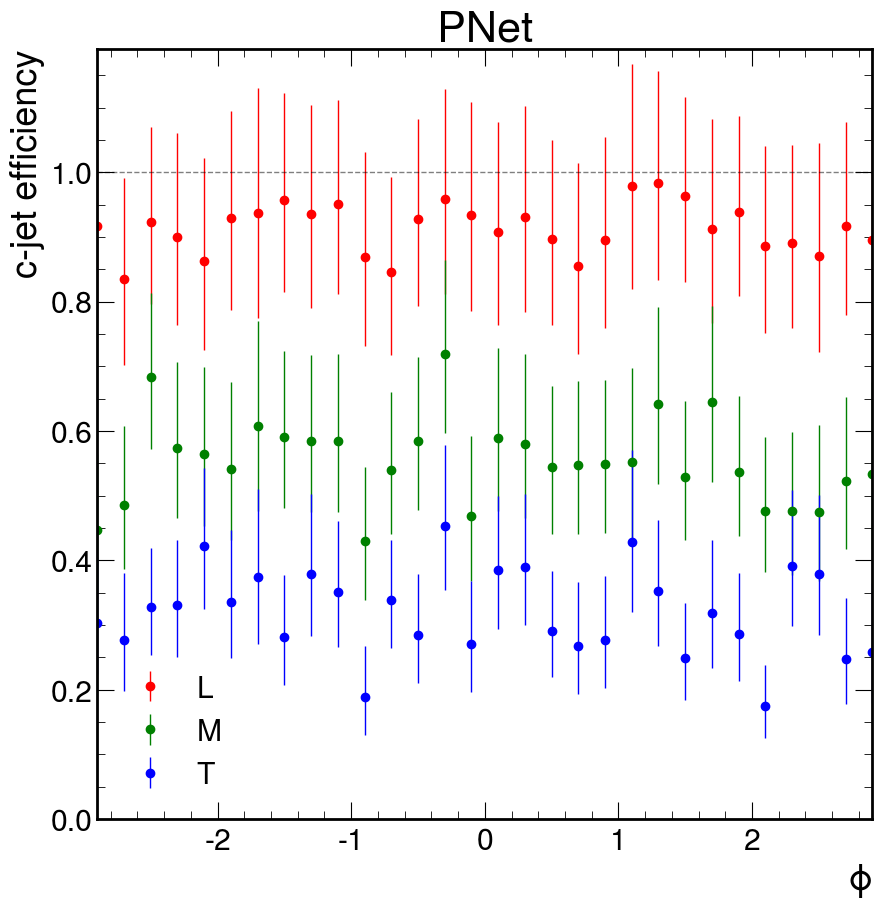

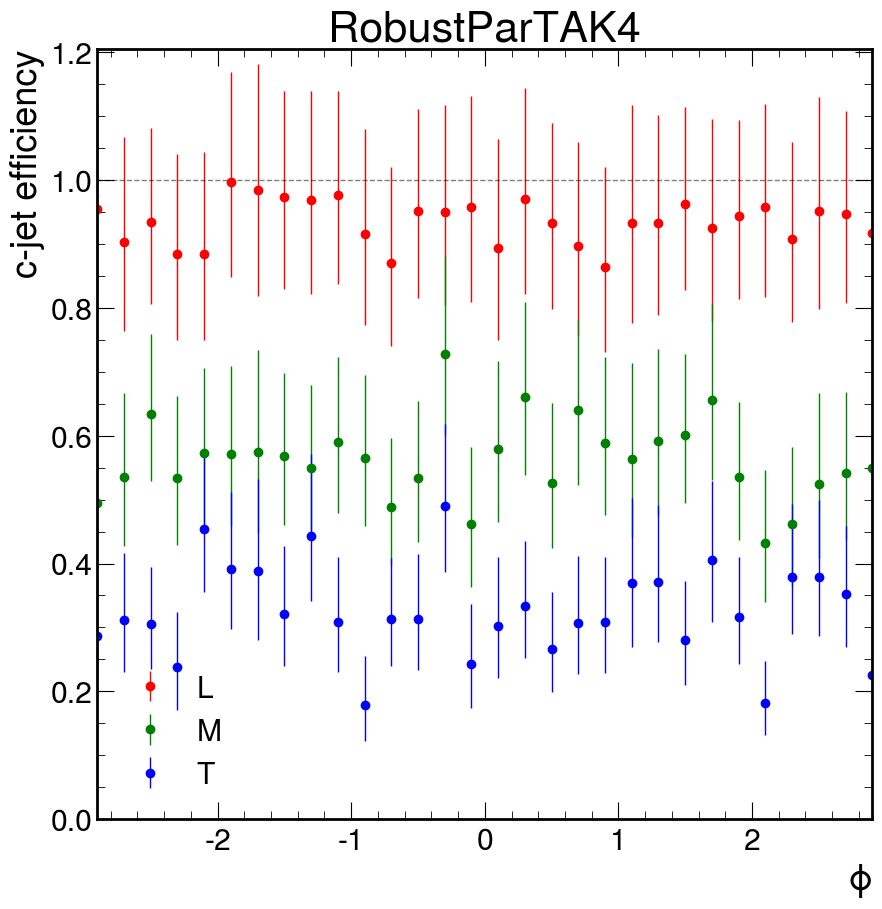

In [6]:
from BTVNanoCommissioning.utils.plot_utils import plotratio

# tagger
color = ["r", "g", "b", "c", "m"]
for j in ["b", "c"]:
    for var in ["pt", "eta", "phi"]:
        for t in range(output[f"{j}jet_WP_{var}"].axes["tagger"].size):
            fig, ax = plt.subplots()
            for wp in range(1, output[f"{j}jet_WP_{var}"].axes["WP"].size):
                label = output[f"{j}jet_WP_{var}"].axes["WP"].value(wp)
                if wp == 1:
                    plotratio(
                        output[f"{j}jet_WP_{var}"][wp, t, :],
                        output[f"{j}jet_WP_{var}"][0, t, :],
                        denom_fill_opts=None,
                        error_opts={"color": color[wp - 1]},
                        ax=ax,
                        label=label,
                    )  # ,denom_fill_opts=None,label=label,ax=ax)
                else:
                    plotratio(
                        output[f"{j}jet_WP_{var}"][wp, t, :],
                        output[f"{j}jet_WP_{var}"][0, t, :],
                        denom_fill_opts=None,
                        clear=False,
                        ax=ax,
                        error_opts={"color": color[wp - 1]},
                        label=label,
                    )
            ax.set_ylabel(f"{j}-jet efficiency")
            ax.set_title(output[f"{j}jet_WP_{var}"].axes["tagger"].value(t))
            ax.legend()